# Telecom X

Análisis de Evasión de Clientes

Como asistente de análisis de datos en Telecom X formamos parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Debemmos:

*   recopilar
*   procesar y analizar los datos

utilizando Python y sus principales bibliotecas para extraer información valiosa.

A partir de este análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.


# Diccionario de datos
* **customerID**: número de identificación único de cada cliente
* **Churn:** si el cliente dejó o no la empresa
* **gender**: género (masculino y femenino)
* **SeniorCitizen** : información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* **Partner**: si el cliente tiene o no una pareja
*  **Dependents**: si el cliente tiene o no dependientes
* **tenure**: meses de contrato del cliente
* **PhoneService**: suscripción al servicio telefónico
* **MultipleLines**: suscripción a más de una línea telefónica
*  **InternetService**: suscripción a un proveedor de internet
*  **OnlineSecurity**: suscripción adicional de seguridad en línea
* **OnlineBackup**: suscripción adicional de respaldo en línea
* **DeviceProtection**: suscripción adicional de protección del dispositivo
* **TechSupport**: suscripción adicional de soporte técnico, menor tiempo de espera
* **StreamingTV**: suscripción de televisión por cable
* **StreamingMovies**: suscripción de streaming de películas
*  **Contract**: tipo de contrato
* **PaperlessBilling**: si el cliente prefiere recibir la factura en línea
* **PaymentMethod**: forma de pago
* **Charges.Monthly**: total de todos los servicios del cliente por mes
* **Charges.Total**: total gastado por el cliente

# Extracción de datos

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

**¿Qué debes hacer?**


✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [36]:
import requests
import json

In [37]:
import pandas as pd
url = "https://raw.githubusercontent.com/NyxJr/Challenges-N-2-Desaf-o-Telecom-X/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
datos_clientes = response.json()
df_clientes = pd.DataFrame(datos_clientes)
print(df_clientes)

      customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'Phone

In [38]:
df_clientes.info()
df_clientes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


# Normalizacion




In [39]:
df_clientes_normalizado=pd.json_normalize(datos_clientes)

In [40]:
df_clientes_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Explorar las columnas del dataset y verificar sus tipos de datos.

In [41]:
df_clientes_normalizado.columns.tolist()

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

Identificar las columnas más relevantes para el análisis de evasión.


*   Churn: si el cliente dejó o no la empresa

*   account.Contract: tipo de contrato

*   tenure: meses de contrato del cliente

*  internet.InternetService', 'internet.OnlineSecurity',
 'internet.OnlineBackup',  'internet.DeviceProtection',
 'internet.TechSupport', 'internet.StreamingTV',
 'internet.StreamingMovies': suscripción a un proveedor de internet (todos)

*   phone.PhoneService','phone.MultipleLines',: suscripción al servicio telefónico(todos)

*   account.Charges.Monthly:total de todos los servicios del cliente por mes


*   account.Charges.Total:total gastado por el cliente


*   account.PaymentMethod:forma de pago


*   customer.gender: género (masculino y femenino)

*   customer.SeniorCitizen:  información sobre si un cliente tiene o no una edad igual o mayor a 65 años

*   customer.Partner :si el cliente tiene o no una pareja

*   customer.Dependents :si el cliente tiene o no dependientes












Se convierte los valores de la columna account.Charge.Total de objetc a numericos
Se utilica la referencia del diccionario.

In [42]:
df_clientes_normalizado['account.Charges.Total'] = pd.to_numeric(df_clientes_normalizado['account.Charges.Total'], errors='coerce')

Valores unicos











In [43]:
for col in df_clientes_normalizado.columns:
    print(f"Valores únicos en la columna '{col}':{df_clientes_normalizado[col].nunique()} ")

    # Esta condición revisa si la columna es categórica y tiene más de un valor único
    if df_clientes_normalizado[col].nunique() < 50 :
        print(df_clientes_normalizado[col].unique())
        print('-'*50)

Valores únicos en la columna 'customerID':7267 
Valores únicos en la columna 'Churn':3 
['No' 'Yes' '']
--------------------------------------------------
Valores únicos en la columna 'customer.gender':2 
['Female' 'Male']
--------------------------------------------------
Valores únicos en la columna 'customer.SeniorCitizen':2 
[0 1]
--------------------------------------------------
Valores únicos en la columna 'customer.Partner':2 
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna 'customer.Dependents':2 
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna 'customer.tenure':73 
Valores únicos en la columna 'phone.PhoneService':2 
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna 'phone.MultipleLines':3 
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores únicos en la columna 'internet.InternetService':3 
['DSL' 'Fiber o

In [44]:
df_clientes_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Verificar si hay duplicados

In [45]:
duplicados = df_clientes_normalizado.duplicated().sum()
print(f"Las lineas duplicadas son : {duplicados}")

Las lineas duplicadas son : 0


Verificar si hay valores nulos

In [46]:
valores_nulos = df_clientes_normalizado.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos >0])


Valores nulos por columna:
account.Charges.Total    11
dtype: int64


Valores en blanco-Vacios



In [47]:
valores_en_blanco_Vacios = df_clientes_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o vacíos por columna:")
print(valores_en_blanco_Vacios[valores_en_blanco_Vacios >0])


Valores en blanco o vacíos por columna:
Churn    224
dtype: int64


In [48]:
df_clientes_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Una de las principales columnas a analisas es Churn, por eso se crea un df nuevo sin valores nulos en la columna.

In [49]:
df_clientes_sin_nulos = df_clientes_normalizado.dropna(subset=['Churn'])
print(f"Filas con nulos en Churn en el nuevo DataFrame: {df_clientes_sin_nulos['Churn'].isnull().sum()}")


Filas con nulos en Churn en el nuevo DataFrame: 0


In [50]:
columnas_con_Y_N = []
for col in df_clientes_sin_nulos.columns:
    # Obtenemos los valores únicos de la columna
    valores_unicos = df_clientes_sin_nulos[col].unique()

    # Convertimos a una lista de texto para una comparación segura
    valores_unicos_texto = [str(val) for val in valores_unicos]

    # Verificamos si los valores 'Yes' y 'No' están presentes
    if 'Yes' in valores_unicos_texto and 'No' in valores_unicos_texto:
        columnas_con_Y_N.append(col)

print("Columnas que contienen 'Yes' y 'No':")
print(columnas_con_Y_N)

Columnas que contienen 'Yes' y 'No':
['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling']


In [51]:
mapeo_binario = {'Yes': 1, 'No': 0}
for col in columnas_con_Y_N:
    df_clientes_sin_nulos[col] = df_clientes_sin_nulos[col].replace(mapeo_binario)
df_clientes_sin_nulos

/tmp/ipython-input-3745376826.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clientes_sin_nulos[col] = df_clientes_sin_nulos[col].replace(mapeo_binario)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [52]:
df_clientes_sin_nulos.drop(df_clientes_sin_nulos[df_clientes_sin_nulos['Churn'] == ''].index, inplace=True)

In [53]:
for col in df_clientes_sin_nulos.columns:
    print(f"Valores únicos en la columna '{col}':{df_clientes_sin_nulos[col].nunique()} ")

    # Esta condición revisa si la columna es categórica y tiene más de un valor único
    if df_clientes_sin_nulos[col].nunique() < 50 :
        print(df_clientes_sin_nulos[col].unique())
        print('-'*50)

Valores únicos en la columna 'customerID':7043 
Valores únicos en la columna 'Churn':2 
[0 1]
--------------------------------------------------
Valores únicos en la columna 'customer.gender':2 
['Female' 'Male']
--------------------------------------------------
Valores únicos en la columna 'customer.SeniorCitizen':2 
[0 1]
--------------------------------------------------
Valores únicos en la columna 'customer.Partner':2 
[1 0]
--------------------------------------------------
Valores únicos en la columna 'customer.Dependents':2 
[1 0]
--------------------------------------------------
Valores únicos en la columna 'customer.tenure':73 
Valores únicos en la columna 'phone.PhoneService':2 
[1 0]
--------------------------------------------------
Valores únicos en la columna 'phone.MultipleLines':3 
[0 1 'No phone service']
--------------------------------------------------
Valores únicos en la columna 'internet.InternetService':3 
['DSL' 'Fiber optic' 'No']
--------------------------

Se remplaza 'no internet service' por No = 0 (Al no tener servicio de internet no puede tener los ortos servicios que de este depende.)

In [54]:
columnas_internet = ['internet.OnlineSecurity',    'internet.OnlineBackup',    'internet.DeviceProtection',    'internet.TechSupport',    'internet.StreamingTV',    'internet.StreamingMovies','internet.InternetService']
for col in columnas_internet:
     df_clientes_sin_nulos[col] = df_clientes_sin_nulos[col].replace('No internet service'and 'No',0 )
display(df_clientes_sin_nulos)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [55]:
df_clientes_sin_nulos['phone.MultipleLines'] = df_clientes_sin_nulos['phone.MultipleLines'].replace('No phone service', 0)
df_clientes_sin_nulos['phone.MultipleLines'] = df_clientes_sin_nulos['phone.MultipleLines'].astype(int)
df_clientes_sin_nulos


/tmp/ipython-input-4004940445.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clientes_sin_nulos['phone.MultipleLines'] = df_clientes_sin_nulos['phone.MultipleLines'].replace('No phone service', 0)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [56]:
valores_en_blanco_Vacios = df_clientes_sin_nulos.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o vacíos por columna:")
print(valores_en_blanco_Vacios[valores_en_blanco_Vacios >0])


Valores en blanco o vacíos por columna:
Series([], dtype: int64)


In [57]:
df_clientes_sin_nulos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [58]:
df_clientes_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   int64  
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [59]:
df_clientes_sin_nulos['account.Charges.Total'] = pd.to_numeric(df_clientes_sin_nulos['account.Charges.Total'], errors='coerce')
df_clientes_sin_nulos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [60]:
df_clientes_sin_nulos['Cuentas_Diarias'] = df_clientes_sin_nulos['account.Charges.Monthly'] / 30
df_clientes_sin_nulos = df_clientes_sin_nulos.round({'Cuentas_Diarias': 2})
df_clientes_sin_nulos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


In [61]:
df_clientes_sin_nulos['tiene_servicio_internet'] = df_clientes_sin_nulos['internet.InternetService'].isin(['Fiber optic', 'DSL']).astype(int)
df_clientes_sin_nulos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,tiene_servicio_internet
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.60,593.30,2.19,1
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00,1
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46,1
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27,1
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,1,0,0,One year,0,Mailed check,55.15,742.90,1.84,1
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84,1
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68,1
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26,1


In [62]:
df_clientes_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   int64  
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [63]:
df_clientes_sin_nulos.columns = df_clientes_sin_nulos.columns.str.lower().str.replace('.', '_')
df_clientes_sin_nulos

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias,tiene_servicio_internet
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.60,593.30,2.19,1
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00,1
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46,1
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27,1
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,1,0,0,One year,0,Mailed check,55.15,742.90,1.84,1
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84,1
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68,1
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26,1


In [64]:
print(df_clientes_sin_nulos.describe())

       customer_seniorcitizen  customer_partner  customer_dependents  \
count             7043.000000       7043.000000          7043.000000   
mean                 0.162147          0.483033             0.299588   
std                  0.368612          0.499748             0.458110   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          0.000000             0.000000   
50%                  0.000000          0.000000             0.000000   
75%                  0.000000          1.000000             1.000000   
max                  1.000000          1.000000             1.000000   

       customer_tenure  phone_phoneservice  phone_multiplelines  \
count      7043.000000         7043.000000          7043.000000   
mean         32.371149            0.903166             0.421837   
std          24.559481            0.295752             0.493888   
min           0.000000            0.000000             0.000000   
25%           9.

In [65]:
conteo_churn = df_clientes_sin_nulos['churn'].value_counts()
print("Conteo de clientes que se quedaron = 0 , clientes que se fueron = 1:")
print(conteo_churn)

Conteo de clientes que se quedaron = 0 , clientes que se fueron = 1:
churn
0    5174
1    1869
Name: count, dtype: int64


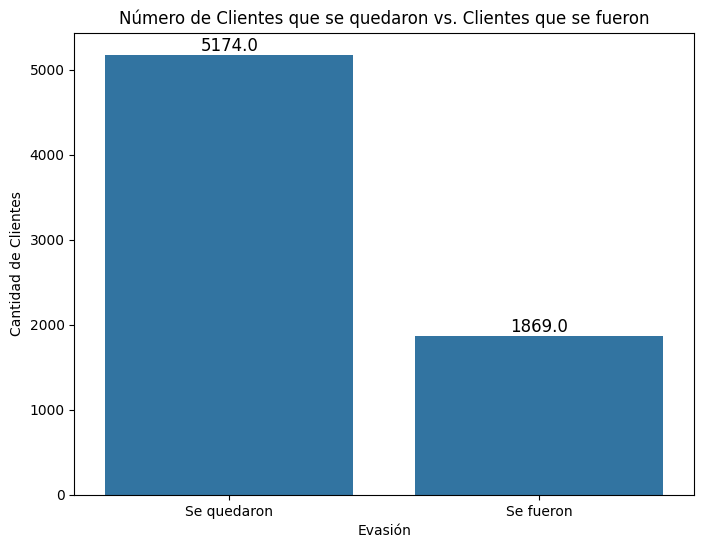

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea una lista de etiquetas para el eje X
etiquetas = ['Se quedaron', 'Se fueron']
valores = [0, 1]

plt.figure(figsize=(8, 6))
grafico = sns.countplot(x='churn', data=df_clientes_sin_nulos)

# Configura las marcas y etiquetas de forma explícita
grafico.set_xticks(valores)
grafico.set_xticklabels(etiquetas)

plt.title('Número de Clientes que se quedaron vs. Clientes que se fueron')
plt.xlabel('Evasión')
plt.ylabel('Cantidad de Clientes')

# Agrega las etiquetas de cantidad en la parte superior de las barras
for p in grafico.patches:
    grafico.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black')

plt.show()

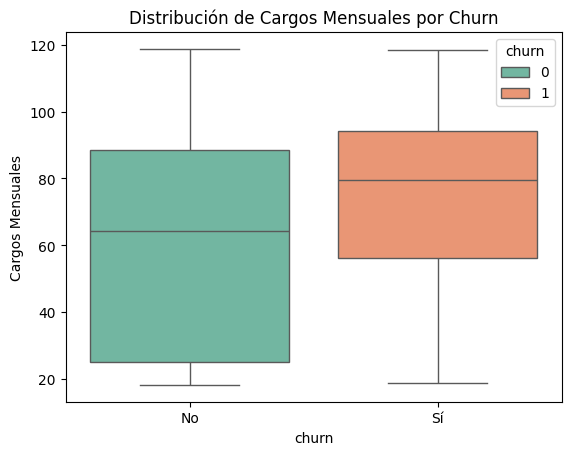

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="churn", y="account_charges_monthly", data=df_clientes_sin_nulos, palette="Set2", hue="churn")
plt.title('Distribución de Cargos Mensuales por Churn')
plt.xticks([0, 1], ['No', 'Sí'])
plt.ylabel('Cargos Mensuales')
plt.show()


Text(0.5, 1.0, 'Distribución de Churn')

<Figure size 500x400 with 0 Axes>

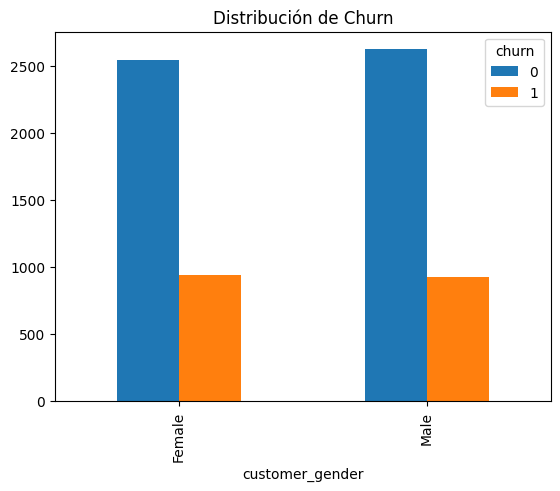

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
df_clientes_sin_nulos.groupby(["customer_gender","churn"]).size().unstack().plot(kind="bar")
plt.title("Distribución de Churn")

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables categóricas a analizar
categoricas = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract',
    'PaymentMethod', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Distribución de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='Churn', labels=['Se quedaron (No)', 'Se fueron (Yes)'])
    plt.xticks(rotation=45)
    plt.show()

NameError: name 'df' is not defined

<Figure size 600x400 with 0 Axes>